## 1) Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.metrics as sk
import warnings
warnings.filterwarnings('ignore')
import stemgraphic

## 2) Loading The Dataset

Firstly, we are loading the car seats dataset.

In [2]:
prodata = pd.read_csv("dataset-11424.csv")

In [3]:
prodata.head()   # Checking the first 5 rows of data.

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


__Carseats__ dataset contains __400__ observations on __eight__ numeric and __three__ object variables.
These object variables are categorical in nature.
Each column represents a variable and each row corresponds to observation on all these variables.

* __Sales__        - Unit sales (in thousands) at each location
* __CompPrice__    - Price charged by a competitor at each location
* __Income__       - Community income level (in thousands of dollars)
* __Advertising__  - Local advertising budget for the company at each location (in thousands of dollars)
* __Population__   - Population size in the region (in thousands)
* __Price__        - Price company charges for car seats at each site
* __ShelveLoc__    - A factor with levels Bad, Good, and Mediumindicating the quality of the shelving location for the car seats at each site.
* __Age__          - Average age of the local population
* __Education__    - Education level at each location
* __Urban__        - A factor with levels No and Yes to indicate whether thestore is in an urban or rural location
* __US__           – A factor with levels No and Yes to indicate whether the store is in the US or not

In [4]:
prodata.info()     # info of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


As we can see from the data, we don't have any null values. So we dont need any data imputation.

In [5]:
prodata.describe()      # Description of the continuous features of the prodata.

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


The __mean__ and __median values__ for these __Sales__ and __Price__ are almost equivalent, indicating that their distributions are somewhat __symmetric__.


In [6]:
prodata.describe(include=object)             # Description of the categorical features of the prodata.

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


## 3) Data Analysis

### 3)(a) Univariate Analysis

In [7]:
cat_var=list(prodata.select_dtypes(include=object).columns)      # Creating a list of categorical features in the data
cat_var

['ShelveLoc', 'Urban', 'US']

In [8]:
# Looking for the unique values of the categorical variables.
for i in cat_var:                    
    z=prodata[i].unique()
    print("The unique values for {} column are {}.".format(i,z))

The unique values for ShelveLoc column are ['Bad' 'Good' 'Medium'].
The unique values for Urban column are ['Yes' 'No'].
The unique values for US column are ['Yes' 'No'].


In [9]:
quant_var=list(prodata.select_dtypes(exclude=object).columns)   # Creating a list of all continuous features of the data

#### Distribution of variables

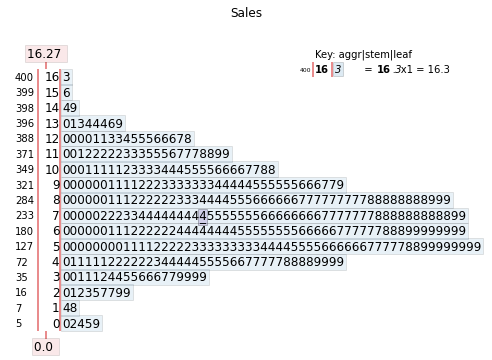

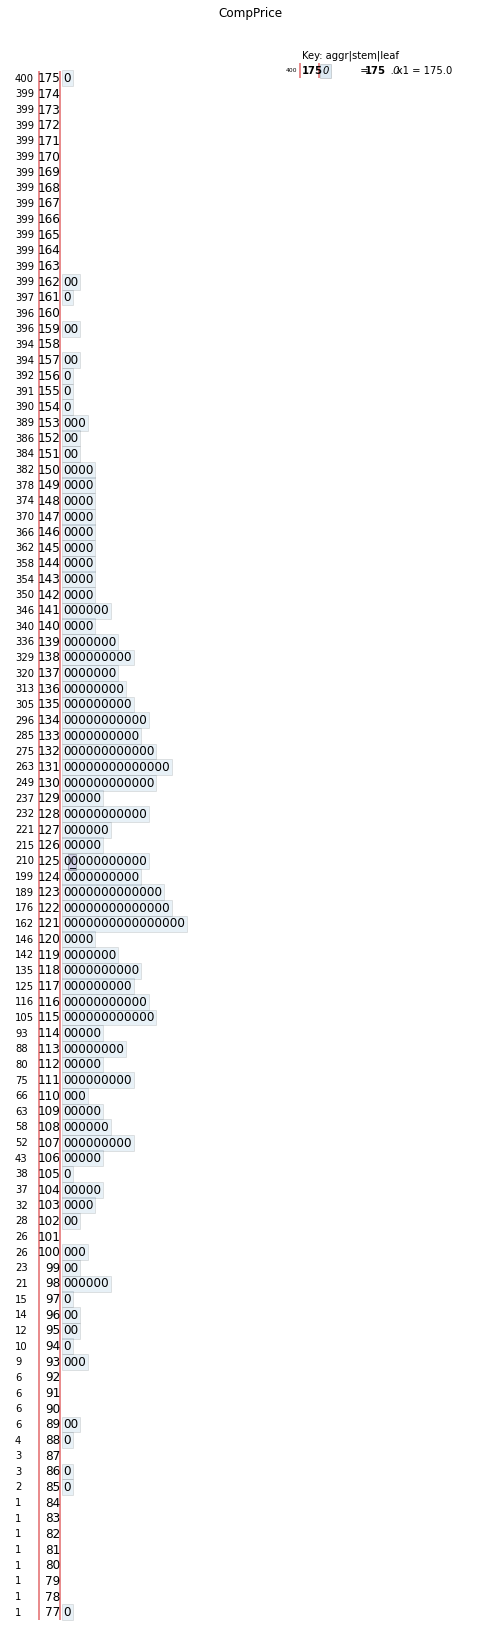

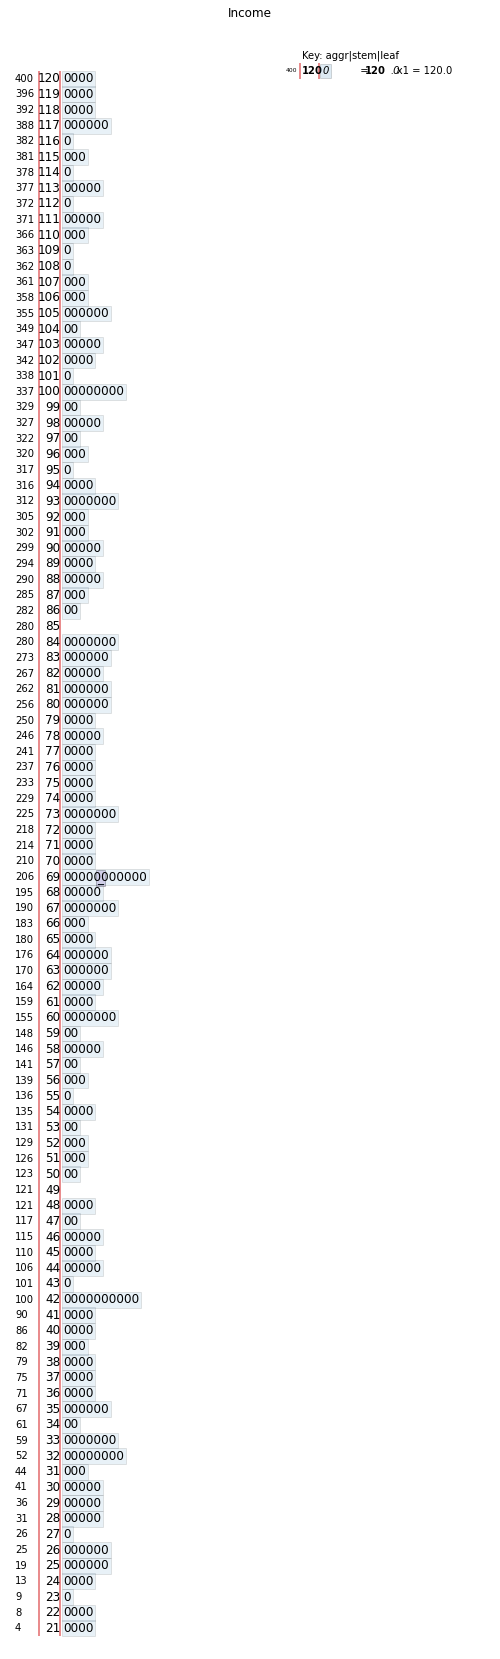

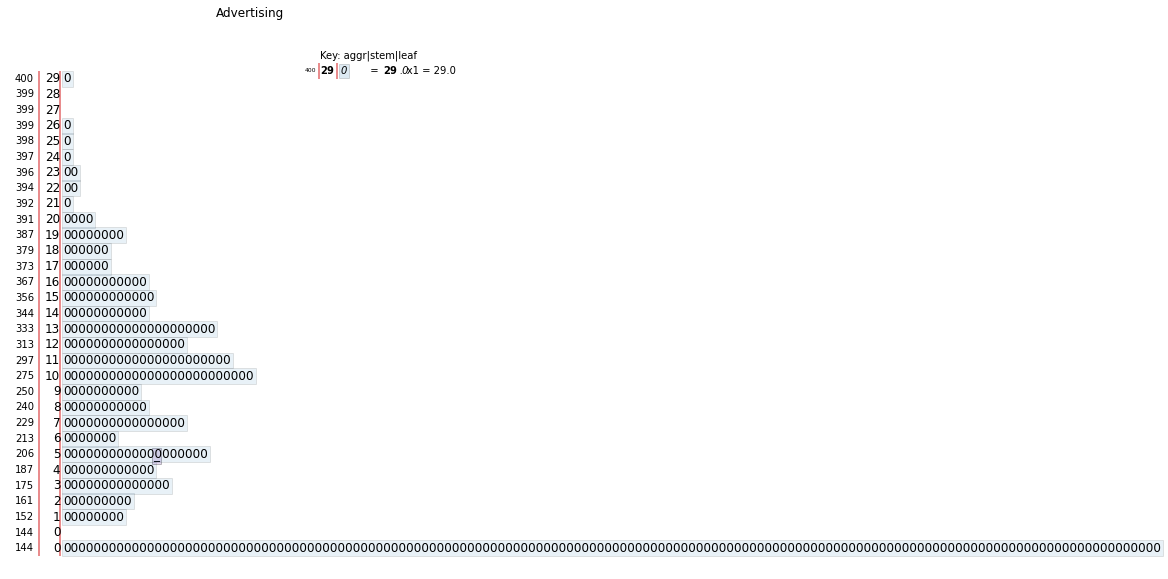

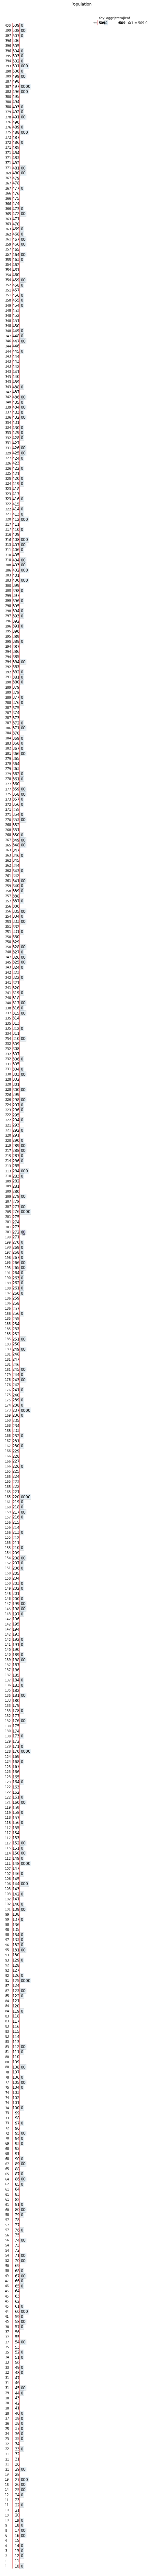

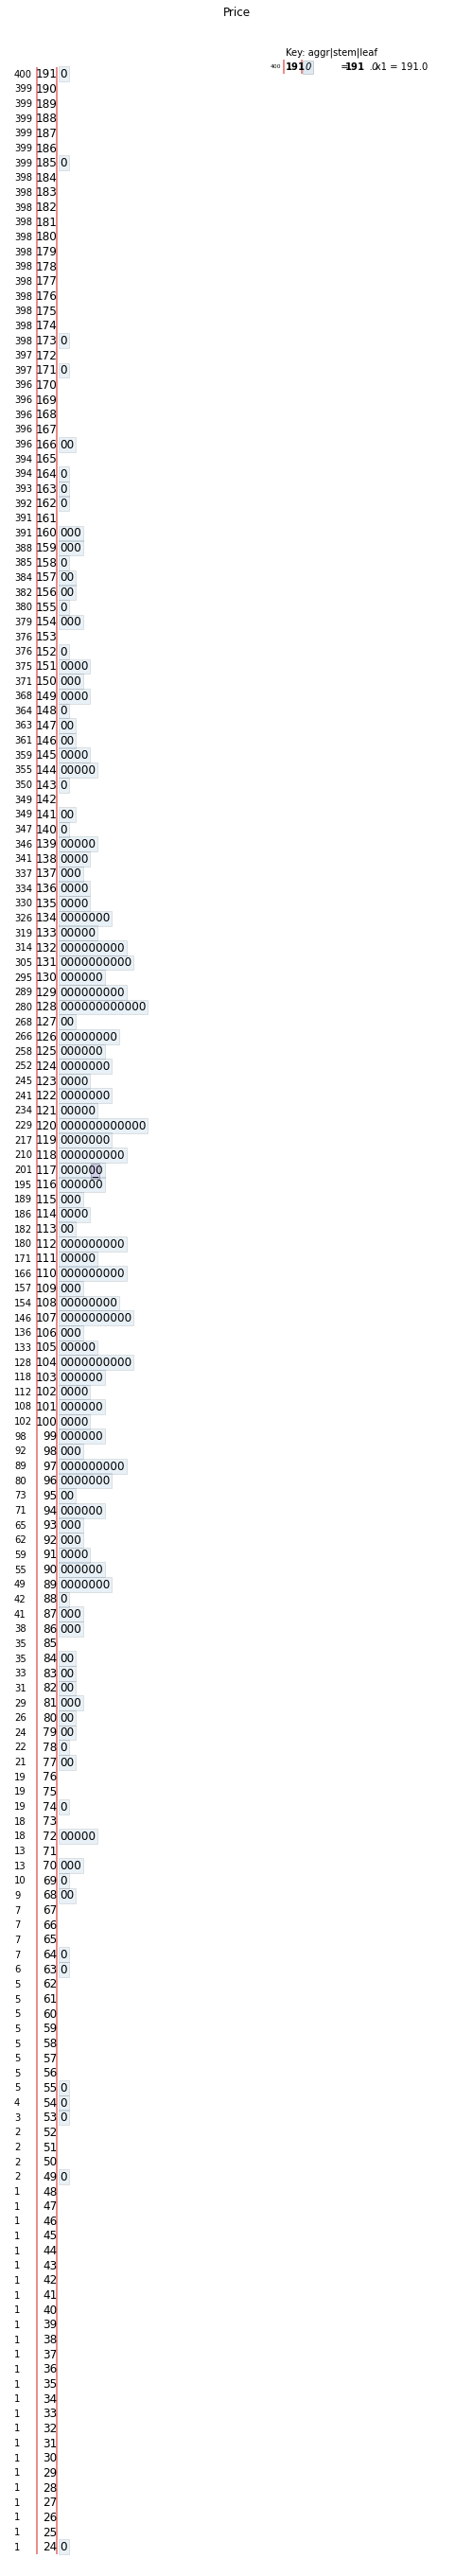

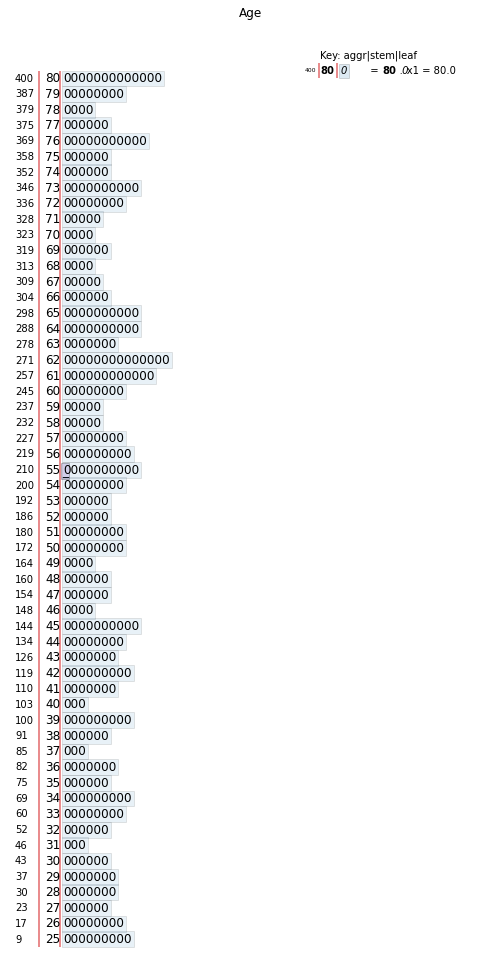

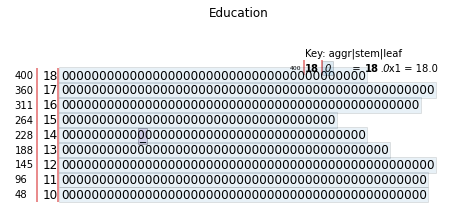

In [10]:
# Creating a stemgraph for each continuous features
for i in quant_var:
    stemgraphic.stem_graphic(prodata[i],scale=1,title=i)

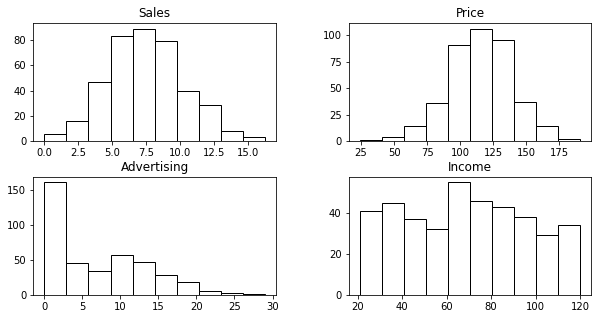

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2,
figsize =(10,5))

# 1st subplot- Sales histogram
prodata.hist(column = 'Sales', ax = axes[0,0],color = 'white', edgecolor = 'black', grid =False)

# 2nd subplot- Price histogram
prodata.hist(column = 'Price', ax = axes[0,1],color = 'white', edgecolor = 'black', grid =False)

# 3rd subplot- Advertising histogram
prodata.hist(column = 'Advertising', ax =axes[1,0], color = 'white', edgecolor = 'black',grid = False)

# 4th subplot- Income histogram
prodata.hist(column = 'Income', ax = axes[1,1],color = 'white', edgecolor = 'black', grid =False)
plt.show()


For each of the given variables, the following observations can be made:
* __Sales__: It appears that the distribution is __symmetric__ and __leptokurtic__.
* __Price__: The distribution seems to be again __symmetric__ and __leptokurtic__.
* __Advertising__: A __leptokurtic right-skew__ in the distribution.
* __Income__: Seems to be __uniformly distributed__.

Since the distributions of __Sales__ and __Price__ seem to be __normally distributed__, it is logical to check the __assumption of normality__ using __Q-Q
plots__.

#### Checking for normality

Text(0.5, 1.0, 'Normal Q-Q plot of log(Sales)')

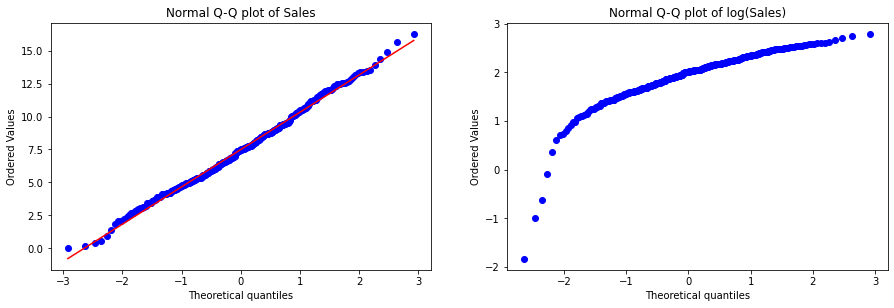

In [12]:
plt.figure(figsize = (15,10))

# 1st subplot- Normal Q-Q plot of Sales to check normality.
plt.subplot(2,2,1)
stats.probplot(prodata['Sales'], dist="norm",plot=plt, fit = True)
plt.title('Normal Q-Q plot of Sales')

#2nd subplot - Normal Q-Q plot for log(Sales) to check log- normality.
plt.subplot(2,2,2)
stats.probplot(np.log(prodata['Sales']),dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of log(Sales)')

The scatter plot of __theoretical__ and __sample quantiles__ fit the reference line better for normal distribution.
Hence, __both Sales and Price seem to have a normal distribution.__

Text(0.5, 1.0, 'Normal Q-Q plot of log(Price)')

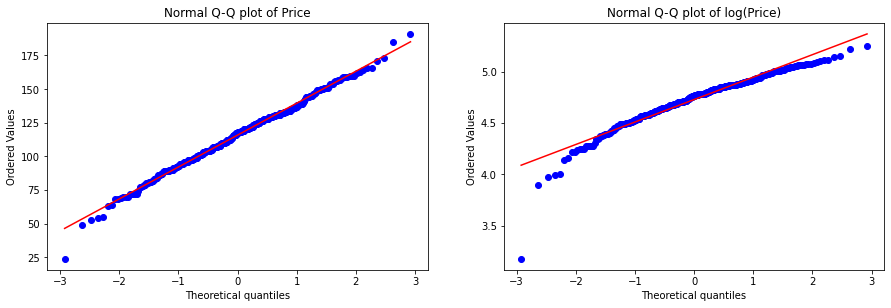

In [13]:
# 1st subplot- Normal Q-Q plot of Price to check normality.
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
stats.probplot(prodata['Price'], dist="norm",plot=plt, fit = True)
plt.title('Normal Q-Q plot of Price')

#2nd subplot - Normal Q-Q plot for log(Price) to check log- normality.
plt.subplot(2,2,2)
stats.probplot(np.log(prodata['Price']),dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of log(Price)')

#### Inference about the mean

Here, we will try to make inferences about the population means of __Sales__ and __Price__.

__Note__: Price and Sales are normally distributed hence the assumption of the t-test is satisfied.

__Null Hypothesis__: True Mean of Sales is 7.
                    
__Alternate Hypothesis__: True Mean of Sales is not 7.

In [14]:
x = prodata['Sales']
mean_sales=np.mean(x)
mean_sales

7.496325

In [15]:
#t-test of one- sample (For Sales)
t,p = stats.ttest_1samp(x,7)
print('t-Statistic =%.4f, p-value =%.4f'%(t,p))

t-Statistic =3.5149, p-value =0.0005


In [16]:
# Confidence Interval of t-statistic (For Sales)
(ll,ul) = stats.t.interval(alpha=0.95,df=len(x)-1, loc=np.mean(x), scale=stats.sem(x))
print("CI for Sales = (%.4f,%.4f)" % (ll,ul))

CI for Sales = (7.2187,7.7739)


__The estimated population mean for sales is 7.496 and the 95% CI is (7.219,7.774).__

With only a 5% chance of being wrong, an assertion can be made that the true mean of Sales lies between 7.22 and 7.77.

__Since the p-value is less than 0.025, reject the null hypothesis and conclude that the true Sales mean is not equal to 7.__

__Null Hypothesis__:- True Mean of Price is 115.
                    
__Alternate Hypothesis__:- True Mean of Price is not 115.

In [17]:
y = prodata['Price']
np.mean(y)

115.795

In [18]:
#t-test of one- sample (For Price)
t,p = stats.ttest_1samp(y,115)
print('t-Statistic = %.4f, p-value = %.4f' % (t,p))

t-Statistic = 0.6715, p-value = 0.5023


In [19]:
# Confidence Interval of t-statistic (For Price)
(ll,ul) = stats.t.interval(alpha=0.95,df=len(y)-1, loc=np.mean(y), scale=stats.sem(y))
print("CI for Sales = (%.4f,%.4f)" % (ll,ul))

CI for Sales = (113.4677,118.1223)


__The estimated population mean for price is 115.795 and the 95% CI is (113.4677,118.1223).__

With only a 5% chance of being wrong, an assertion can be made that the true mean of Sales lies between 113.46 and 118.12.

__Since the p-value is greater than 0.025, we fail to reject the null hypothesis and conclude that the true Price mean is equal to 115.__

#### Impact of Categorical variables

In [20]:
proUSyes=prodata[prodata["US"]=="Yes"]        # Creating a dataframe where we are giving a restriction of US = "Yes"
proUSno=prodata[prodata["US"]=="No"]          # Creating a dataframe where we are giving a restriction of US = "No"

In [21]:
proUSno.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,6.823028,124.626761,65.281690,0.507042,252.823944,113.950704,53.133803,14.176056
std,2.602585,16.021089,27.778599,1.644878,152.355328,25.506869,17.339427,2.521677
min,0.000000,77.000000,22.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.080000,115.000000,39.000000,0.000000,113.750000,98.000000,38.000000,12.000000
50%,6.660000,124.000000,66.500000,0.000000,244.000000,116.500000,54.500000,14.000000
75%,8.522500,134.000000,84.000000,0.000000,398.250000,129.750000,65.750000,16.000000
max,14.900000,159.000000,120.000000,11.000000,508.000000,185.000000,80.000000,18.000000


In [22]:
proUSyes.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,7.866899,125.166667,70.515504,10.007752,271.453488,116.810078,53.426357,13.748062
std,2.877131,14.971547,27.979456,5.917061,144.436459,22.593489,15.571737,2.665987
min,0.370000,85.000000,21.000000,0.000000,12.000000,55.000000,25.000000,10.000000
25%,5.762500,115.250000,45.000000,5.000000,148.250000,101.000000,41.250000,11.000000
50%,7.790000,125.000000,70.000000,10.000000,281.500000,118.000000,54.500000,14.000000
75%,9.987500,135.000000,93.000000,14.000000,397.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Here, there seems to be a lot of difference in the advertising budgets __inside__ and __outside the US__.

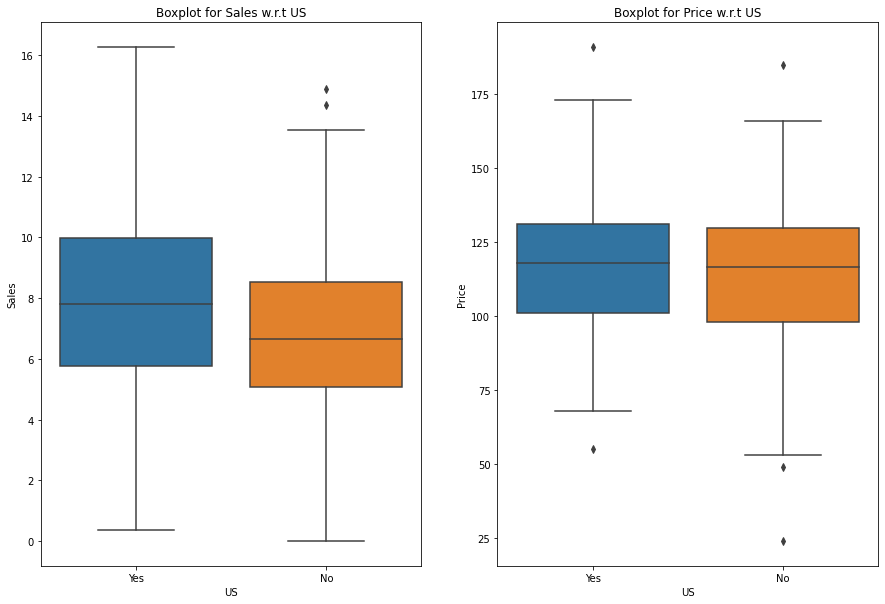

In [23]:
# 1st subplot- Boxplot of Sales with respect to US column
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.boxplot(x = prodata['US'],y =prodata['Sales'])
plt.title("Boxplot for Sales w.r.t US")

# 2nd subplot- Boxplot of Price with respect to US column
plt.subplot(1,2,2)
sns.boxplot(x = prodata['US'],y =prodata['Price'])
plt.title("Boxplot for Price w.r.t US")
plt.show()

In these boxplots, you can observe that __Sales__ are slightly higher inside the US. 
However, the distribution of __Price__ does not seem to vary much inside and outside the US.

There appears to be __no difference__ between Prices inside and outside the US. But to check if the difference observed in Sales is __statistically
significant__ or not, an __independent sample t-test__ has to be performed.

__Null Hypothesis__:- Sales do not differ significantly inside and outside the US in the given sample.

__Alternate Hypothesis__:- Sales differ significantly inside and outside the US in the given sample. 

In [24]:
#t-test of two- samples (For Sales)
t,p = stats.ttest_ind(proUSno['Sales'],proUSyes['Sales'], equal_var = False)
print("t-statistic for independent t-test on Sales = %.4f and p-value = %.4f" % (t,p))

t-statistic for independent t-test on Sales = -3.6956 and p-value = 0.0003


For Sales, since the __p-value is less than 0.025__, we reject the null hypothesis and conclude that __sales differ significantly inside and outside the US.__

In [25]:
#t-test of two- samples (For Price)
t,p = stats.ttest_ind(proUSno['Price'],
proUSyes['Price'], equal_var = False)
print("t-statistic for independent t-test on Price = %.4f and p-value = %.4f" % (t,p))

t-statistic for independent t-test on Price = -1.1164 and p-value = 0.2653


For Price, since the __p-value is greater than 0.025__, do not reject the
hypothesis and conclude that __prices do not differ significantly inside and
outside the US in the given sample__.

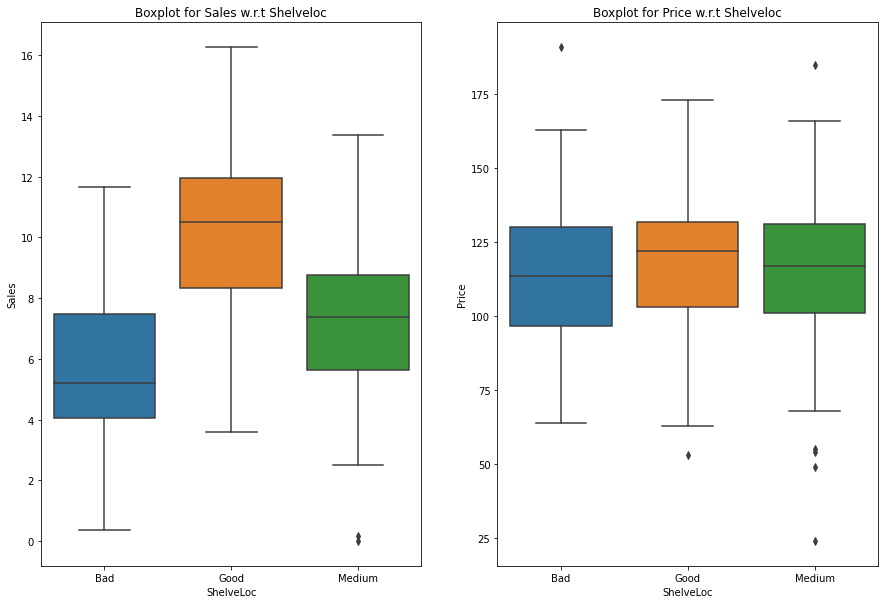

In [26]:
plt.figure(figsize = (15,10))
# 1st subplot - Boxplot for Sales w.r.t ShelveLoc
plt.subplot(1,2,1)
sns.boxplot(x = prodata['ShelveLoc'],y =prodata['Sales'])
plt.title("Boxplot for Sales w.r.t Shelveloc")

# 2nd subplot - Boxplot for Price w.r.t ShelveLoc
plt.subplot(1,2,2)
sns.boxplot(x = prodata['ShelveLoc'],y =prodata['Price'])
plt.title("Boxplot for Price w.r.t Shelveloc")
plt.show()

Sales seem to be impacted by __ShelveLoc__. The __median of Sales__ is highest for Good followed by Medium and Bad respectively.

However, to test for the statistical significance of the difference between means of Sales across the three levels of ShelveLoc, an __F-test__ has to be performed.

Now we determine whether there are any __statistically significant__ differences on the mean of __Sales__ w.r.t different levels of ShelveLoc.__

__Null Hypothesis__: There is no __significant difference__ between the mean of __Sales__ w.r.t different levels of ShelveLoc.

__Alternate Hypothess__: There is a __significant difference__ between the mean of __Sales__ w.r.t different levels of ShelveLoc.

In [27]:
# Anova one-way of Sales for different unique elements of Shelveloc
F,p = stats.f_oneway(prodata['Sales'][prodata['ShelveLoc']=='Bad'],prodata['Sales'][prodata['ShelveLoc']=='Good'],prodata['Sales'][prodata['ShelveLoc']=='Medium'])
print('F-Statistic = %.4f, p-value = %.4f' % (F,p))

F-Statistic = 92.2299, p-value = 0.0000


For Sales, since the __p-value is lesser than 0.05__, we reject the Null hypothesis and conclude that __there is a significant difference between the mean of Sales w.r.t different levels of ShelveLoc__.

Now we determine whether there are any __statistically significant__ differences on the mean of __Price__ w.r.t different levels of ShelveLoc.__

__Null Hypotheses__: There is no __significant difference__ between the mean of __Prices__ w.r.t different levels of ShelveLoc.

__Alternate Hypotheses__: There is a __significant difference__ between the mean of __Prices__ w.r.t different levels of ShelveLoc.

In [28]:
# Anova one-way of Price for different unique elements of Shelveloc
F,p = stats.f_oneway(prodata['Price'][prodata['ShelveLoc']=='Bad'],prodata['Price'][prodata['ShelveLoc']=='Good'],prodata['Price'][prodata['ShelveLoc']=='Medium'])
print('F-Statistic = %.4f, p-value = %.4f' % (F,p))

F-Statistic = 0.5319, p-value = 0.5879


For Price, since the __p-value is greater than 0.05__, we fail to  reject the Null hypothesis and conclude that __there is no significant difference between the mean of Prices w.r.t different levels of ShelveLoc__.

### 3)(b) Bivariate Analysis

#### Correlation analysis

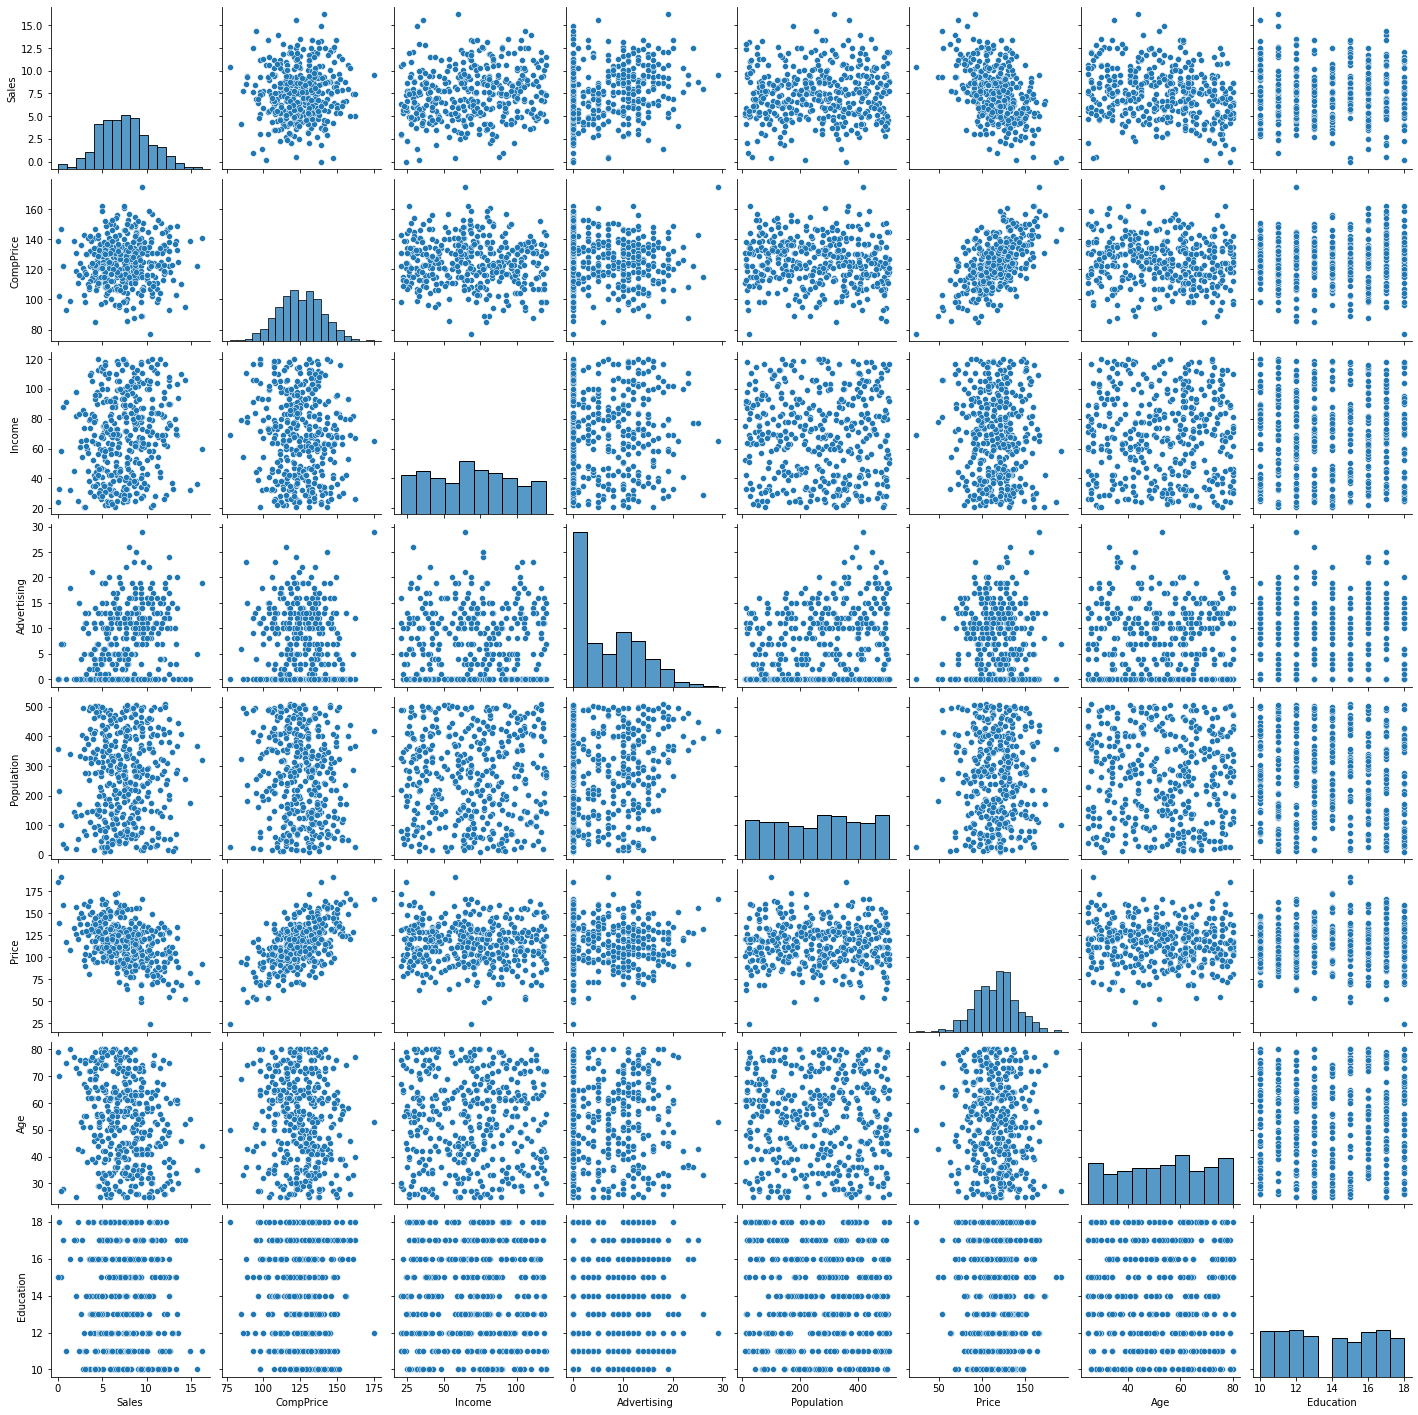

In [29]:
# Creating a pairplot of the data
sns.pairplot(prodata)

In the above plot, a __negative correlation__ between __Sales__ and __Price__ can be observed. Whereas, __Sales__ and __Advertising__ appear to be __slightly positively correlated__.

Text(0.5, 1.0, 'Regression plot of Price w.r.t Sales')

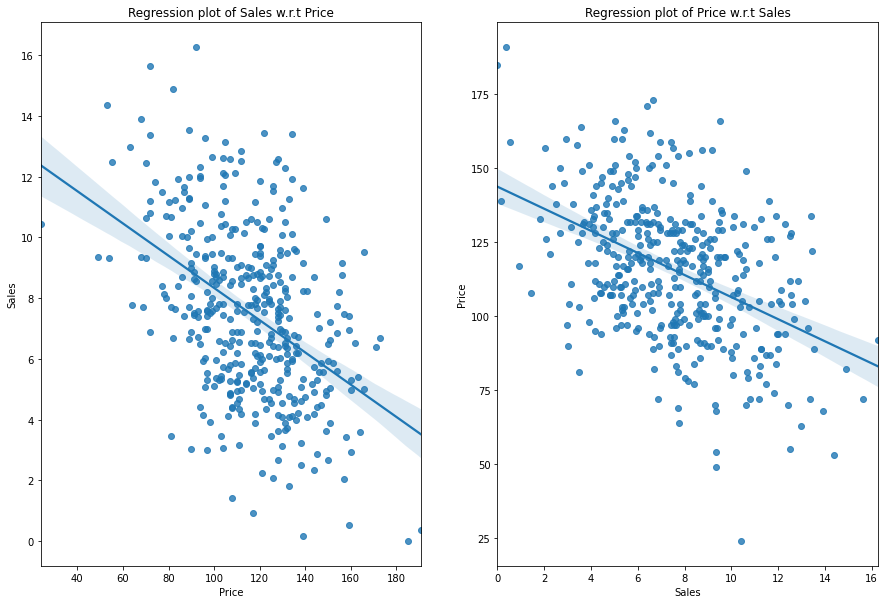

In [30]:
# Creating a regression plot of Price and Sales
plt.figure(figsize = (15,10))

# 1st subplot- Regression plot of Sales w.r.t Price
plt.subplot(1,2,1)
sns.regplot("Price","Sales",prodata)
plt.title("Regression plot of Sales w.r.t Price")

# 2nd subplot- Regression plot of Price w.r.t Sales
plt.subplot(1,2,2)
sns.regplot("Sales","Price",prodata)
plt.title("Regression plot of Price w.r.t Sales")

In [31]:
print(prodata[['Sales','Price']].corr().round(5))      # Correlation between Sales and Price

         Sales    Price
Sales  1.00000 -0.44495
Price -0.44495  1.00000


The relationship between __Price__ and __Sales__ is negative. That is, at a __higher price__, __sales tend to be lower__. The line of best fit also has a
negative slope in the above plots.

Text(0.5, 1.0, 'Regression plot of Advertising w.r.t Sales')

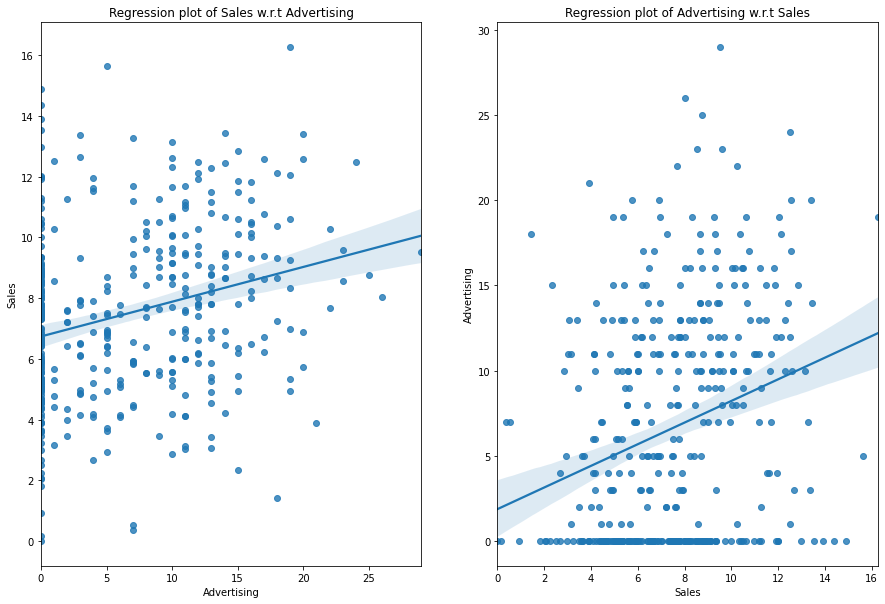

In [32]:
plt.figure(figsize = (15,10))

# 1st subplot - Regression plot of Sales w.r.t Advertising
plt.subplot(1,2,1)
sns.regplot("Advertising","Sales",prodata)
plt.title("Regression plot of Sales w.r.t Advertising")

# 2nd subplot - Regression plot of Advertising w.r.t Sales.
plt.subplot(1,2,2)
sns.regplot("Sales","Advertising",prodata)
plt.title("Regression plot of Advertising w.r.t Sales")

In [33]:
prodata[["Sales","Advertising"]].corr()    # Correlation between Sales and Advertising

,Sales,Advertising
Sales,1.000000,0.269507
Advertising,0.269507,1.000000


There is a mildly positive association between __Advertising__ and __Sales__. The scattered points suggest that the linear relationship is __not strong__.

Now we determine if __Sales__ and __Price__ are __significantly correlated__.

__Null Hypothesis__: Sales and price are not significantly correlated 

__Alternate Hypothesis__: Sales and price are significantly correlated 

In [34]:
c,p = stats.pearsonr(prodata['Sales'],prodata['Price'])
print("Correlation coefficient of Sales and Price = %f\n p-value = %f" % (c,p))

Correlation coefficient of Sales and Price = -0.444951
 p-value = 0.000000


Since p-value is less than __0.05__, we reject the Null Hypothesis and conclude that __Sales and price are significantly correlated.__

Now we determine if __Sales__ and __Advertising__ are __significantly correlated__.

__Null Hypothesis__: Sales and Advertising are not significantly correlated 

__Alternate Hypothesis__: Sales and Advertising are significantly correlated 

In [35]:
c,p = stats.pearsonr(prodata['Sales'],prodata['Advertising'])
print('correlation coefficient between Sales and Advertising = %f \n p-value = %f' % (c,p))

correlation coefficient between Sales and Advertising = 0.269507 
 p-value = 0.000000


Since p-value is less than __0.05__, we reject the Null Hypothesis and conclude that __Sales and Advertising are significantly correlated.__

#### Bivariate Linear Regression Analysis

In [36]:
X = prodata['Price']
Y = prodata['Sales']
X = sm.add_constant(X)  # Adding a constant in X

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           7.62e-21
Time:                        18:59:29   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.0

__Sales__ = 13.6419 - 0.0531*__Price__

For a __unit increase in Price, Sales are expected to decrease by
approximately 53 units__.

__Note__: Sales in Carseats dataset is given in thousands.

The __adjusted R2__ of the above model is __0.196__. Hence, __19.6%__ of the
variability in Sales is explained by Price.


In [37]:
X_p = prodata['Advertising']
Y_p = prodata['Sales']
X_p = sm.add_constant(X_p)    # Adding a constant in X_p

model_p = sm.OLS(Y_p, X_p).fit()
print(model_p.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           4.38e-08
Time:                        18:59:29   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7370      0.192     35.007      

__Sales__ = 6.7370 + 0.1144*__Advertising__

For a __unit increase in Price, Sales are expected to increase by approximately 11 units__.

__Note__: Sales in Carseats dataset is given in thousands.

The __adjusted R2__ of the above model is __0.073__. Hence, __7.3%__ of the
variability in Sales is explained by Advertising.

#### Regression Diagnostics

Now we check the __assumptions of the Bivariate Linear Model__ through various plots.

Now, we plot the actual values along with the fitted regression line to check if the expected value of the error terms should be zero.

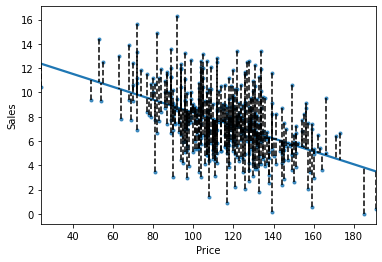

In [38]:
# Creating a regplot
fig1,ax1 = plt.subplots()
sns.regplot('Price','Sales', data = prodata, ax= ax1, ci = False, marker = '.')
ax1.plot([prodata['Price'],prodata['Price']],[prodata['Sales'],model.predict()], linestyle='--',color = 'black')
plt.show()

Predicted values and the observed values are __symmetrical about the 1-1 line__. This suggests that the respective assumption is met. 

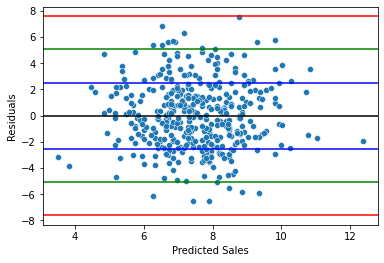

In [39]:
Y_pred = model.predict(X)
residuals = Y - Y_pred
sd_red=np.std(residuals)
a=[-3,-2,-1,0,1,2,3]
b=['r','g','b','k','b','g','r']
sns.scatterplot(Y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
for i,j in zip(a,b):
    plt.axhline(i*sd_red,color=j)

There is __no visible pattern__ in the plot and the spread seems to be random.
This confirms that there is __no heteroscedasticity__ in the data.

__Note__: The points on the upper and lower half of the plot are almost equal

Now we check the assumption of errors being normally distributed with mean 0.

Text(0.5, 1.0, 'res_hist')

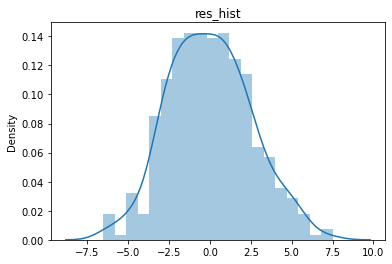

In [40]:
sns.distplot(residuals , bins = 20)
plt.title('res_hist')

__Based on the above-plotted histogram, the residuals are symmetric about zero and seem to be normally distributed.__

Now to confirm the normal distribution of errors, we check that through __Q-Q plot__.

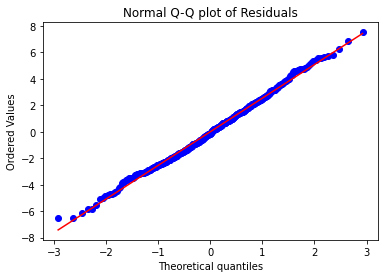

In [41]:
stats.probplot(residuals, dist="norm", plot=plt,
fit = True)
plt.title('Normal Q-Q plot of Residuals')
plt.show()

For most of the part, the residuals follow the __theoretical normal distribution__.Well they are very close to the __normal line__. However, there
is a slight deviation towards the left end. This deviation does not seem significant for the analysis and can be ignored.

#### R2( R square)

Now we find __R2__ of both the models, i.e. __Sales v/s price and Sales v/s Advertising__.

In [42]:
r2 = sk.r2_score(Y, Y_pred)
print('R2' + ' = ' + str(r2.round(5)))

R2 = 0.19798


The __R2__ of the above model is __0.19798__. Hence, __19.798%__ of the variability in Sales is explained by Price.

#### Prediction of the response variable

Now we predict the value of __Sales__ for mean value of __Price__.

In [43]:
mean_p = np.mean(X['Price'])
print(mean_p)

115.795


In [44]:
# Parameters of the model
mp = model.params
print(mp)

const    13.641915
Price    -0.053073
dtype: float64


In [45]:
# Using the Method of Regression Equation
predsales1 = mp['const'] + mean_p*mp['Price']
print(predsales1.round(5))

7.49633


In [46]:
# Using the predict function
p = [1, 115.795]
predsales2 = model.predict(p)
print(predsales2.round(5))

[7.49633]


The fitted value comes out to be the __same__ for both the methods.

#### Prediction and Confidence Interval

Now we make a prediction DataFrame for the unique values of Price and then compute __Confidence__ and __Prediction Intervals__.

In [47]:
result = model.get_prediction().summary_frame()
result.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.273153,0.128603,7.020328,7.525978,2.288331,12.257975
1,9.236855,0.216487,8.811255,9.662455,4.240289,14.233420
2,9.396074,0.229708,8.944481,9.847667,4.397227,14.394920
3,8.493832,0.161739,8.175864,8.811801,3.505282,13.482383
4,6.848569,0.142486,6.568449,7.128689,1.862288,11.834850


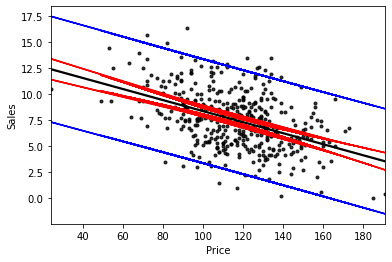

In [48]:
# graphical visualization of the prediction interval and the confidence interval.
fig1,ax1 = plt.subplots()
sns.regplot('Price','Sales', data=prodata, ax=ax1, ci=False, marker='.', color='black')
ax1.plot(prodata['Price'],result['mean_ci_lower'], color='red')
ax1.plot(prodata['Price'],result['mean_ci_upper'], color='red')
ax1.plot(prodata['Price'],result['obs_ci_lower'], color='b')
ax1.plot(prodata['Price'],result['obs_ci_upper'], color='b')
plt.show()

We can see that the __prediction__ interval (blue line) is much wider than the __confidence interval__ (red line).

### 4) Multivariate Correlation and Regression

#### MultivariateCorrelation Analysis

To have an idea about the correlation between the variables a heatmap is created by using the heatmap() function from the
seaborn library.

<AxesSubplot:>

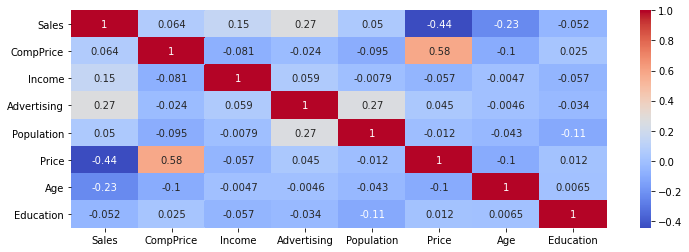

In [49]:
plt.figure(figsize=(12,4))
sns.heatmap(prodata.corr(),annot=True,cmap="coolwarm")

* The __Sales__ variable has a moderate __negative correlation with Price__, a __low positive correlation with Advertising__ and __Income__, and a very __low positive correlation with CompPrice__.
* __Price__ has a __very low positive__ and __negative correlation with Advertising and Income__ respectively. It also shows a moderately positive correlation with __CompPrice__.
* __Advertising__ has a __very low positive and negative correlation with Income and CompPrice__ respectively.
* __Income__ has a __very low negative correlation with CompPrice__.

#### Multiple Regression Analysis

A __null model__ which has no predictors and contains one intercept where the intercept is the mean of Y is created.

In [50]:
X1 = np.ones(400)            #pass an array of ones as the independent variable.
null = sm.OLS(Y, X1).fit()
null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                nan
Time:                        18:59:31   Log-Likelihood:                -982.35
No. Observations:                 400   AIC:                             1967.
Df Residuals:                     399   BIC:                             1971.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4963      0.141     53.088      0.000       7.219       7.774
==============================================================================
Omnibus:                        2.381   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.428
Skew:                           0.185   Prob(JB):                        0.297
Kurtosis:                       2.905   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since there is no independent variable in the model, __Null model does not return any R2 or adjusted R2 value__.

After this, we analyze the relationship between Sales and Price. Since we have already fitted a simple linear regression model for Sales on price. Hence, the summary() function on the previously created model named as 'model' can be used.

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           7.62e-21
Time:                        18:59:31   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There exists __some correlation__ between Sales and Advertising as well. So, to compare, another simple linear regression model is fitted with Sales as the dependent variable and Advertising as the independent variable.

In [52]:
X2 = prodata[['Advertising']]
X2 = sm.add_constant(X2)
modelS_Ad = sm.OLS(Y, X2).fit()
modelS_Ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           4.38e-08
Time:                        18:59:31   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7370      0.192     35.007      0.000       6.359       7.115
Advertising     0.1144      0.020      5.583      0.000       0.074       0.155
==============================================================================
Omnibus:                        3.396   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.137
Skew:                           0.200   Prob(JB):                        0.208
Kurtosis:                       3.167   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, a Multiple Linear Regression Model is fitted using __both Price and Advertising__ as the independent variables since the advertising budget can influence sales.

In [53]:
X3 = prodata[['Price', 'Advertising']]
X3 = sm.add_constant(X3)
model_mult = sm.OLS(Y, X3).fit()
model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     77.91
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           2.87e-29
Time:                        18:59:31   Log-Likelihood:                -916.14
No. Observations:                 400   AIC:                             1838.
Df Residuals:                     397   BIC:                             1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0034      0.607     21.428      0.000      11.810      14.196
Price          -0.0546      0.005    -10.755      0.000      -0.065      -0.045
Advertising     0.1231      0.018      6.809      0.000       0.088       0.159
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.006
Skew:                           0.121   Prob(JB):                        0.605
Kurtosis:                       3.037   Cond. No.                         599.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It is observed from the above output that the Price and Advertising have p-values < 0.05. This suggests that both the variables
are __significant__ for the regression.

#### Comparing the Models using AdjustedR2 , AIC and ANOVA

Comparison using __Adjusted Rsquare__ values

In [54]:
print("The adjusted R2 for null model: {}".format(null.rsquared_adj.round(5)))
print("The adjusted R2 for Sales vs Price model: {}".format(model.rsquared_adj.round(5)))
print("The adjusted R2 for Sales vs Advertising model: {}".format(modelS_Ad.rsquared_adj.round(5)))
print("The adjusted R2 for Sales vs Advertising and Price model: {}".format(model_mult.rsquared_adj.round(5)))

The adjusted R2 for null model: 0.0
The adjusted R2 for Sales vs Price model: 0.19597
The adjusted R2 for Sales vs Advertising model: 0.0703
The adjusted R2 for Sales vs Advertising and Price model: 0.27824


Adding Advertising variable to a linear regression of Sales~Price increased adjusted R2 from __0.196__ to __0.278__

The multiple linear regression model of Sales on Price and Advertising has a higher adjusted R2 as compared to the other simple models. This
suggests an improvement in the model fit.

Comparison using __AIC__

In [55]:
print("The AIC for null model: {}".format(null.aic.round(5)))
print("The AIC for Sales vs Price model: {}".format(model.aic.round(5)))
print("The AIC for Sales vs Advertising model: {}".format(modelS_Ad.aic.round(5)))
print("The AIC for Sales vs Advertising and Price model: {}".format(model_mult.aic.round(5)))

The AIC for null model: 1966.70562
The AIC for Sales vs Price model: 1880.45635
The AIC for Sales vs Advertising model: 1938.54287
The AIC for Sales vs Advertising and Price model: 1838.27177


The multiple linear regression model of Sales on both Price and Advertising has the __lowest AIC__ among the set of candidate models and hence it is the best.

Comparison using __ANOVA__

__Null Hypothesis__: There is no significant difference between the Sales vs Price model and the Multivariate Regression Model.

__Alternate Hypothesis__: There is a significant difference between the Sales vs Price and the Multivariate Regression Model.

In [56]:
from statsmodels.stats.anova import anova_lm
anova1 = anova_lm(model, model_mult)
anova1

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,398.0,2552.244293,0.0,NaN,NaN,NaN
1,397.0,2285.332743,1.0,266.91155,46.36694,3.639822e-11


Since __p-value < 0.05__ for the ANOVA test. Hence, we reject the null
hypothesis and conclude that __the multiple regression model of Sales is
better than the simple model of Sales on Price__.

In [57]:
print('Reduction in RSS = {}'.format((anova1['ssr'][0] - anova1['ssr'][1])/anova1['ssr'][0])) 

Reduction in RSS = 0.10457915441004215


The simple model has one higher degree of freedom as it has one
less independent variable in the model. A __10.45%__ reduction is seen in the
Residual Sum of Squares as compared to the simple model

__Null Hypothesis__: There is no significant difference between the Sales vs Advertising model and the Multivariate Regression Model.

__Alternate Hypothesis__: There is a significant difference between the Sales vs Advertising model and the Multivariate Regression Model.

In [58]:
anova2= anova_lm(modelS_Ad, model_mult)
anova2

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,398.0,2951.133659,0.0,NaN,NaN,NaN
1,397.0,2285.332743,1.0,665.800916,115.660603,7.596365e-24


Since __p-value < 0.05__ for the ANOVA test. Hence, we reject the null
hypothesis and conclude that __the multiple regression model of Sales is
better than the simple model of Sales on Advertising__.

In [59]:
print('Reduction in RSS = ' + str((anova2['ssr'][0] - anova2['ssr'][1])/anova2['ssr'][0]))

Reduction in RSS = 0.22560852645992305


The simple model has one higher degree of freedom as it has one
less independent variable in the model. A __22.56%__ reduction is seen in the
Residual Sum of Squares as compared to the Sales on Advertising.

#### Regression Diagnostics

To plot the diagnostics of a multiple regression model, 3 plots have been made.
* 1) To check for the __normality of residuals__, you can make a Q-Q plot
of the residuals.
* 2) To assess the fit of the model, __plot fitted vs. observed values__ of the
response variable and compare it with a line having intercept 0 and
slope 1.
* 3) To check for the __assumption of homoscedasticity__ (constant
variance), plot residuals vs. fitted values and check if the scatter is
random or not.


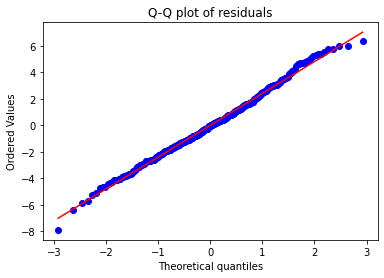

In [60]:
#Q-Q plot of residuals
pred_mult = model_mult.predict(X3)
resid_mult = Y - pred_mult
stats.probplot(resid_mult, dist = "norm", plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

The points lie close to the Q-Q Line, then it is reasonable to assume that the data is __normally distributed__.

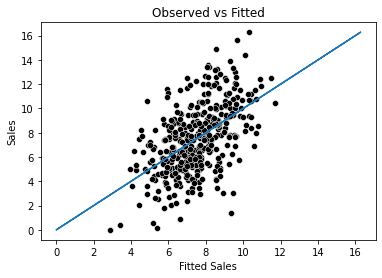

In [61]:
# Fitted vs Actual Sales
sns.scatterplot(pred_mult, Y, color = 'black')
plt.xlabel('Fitted Sales')
plt.ylabel('Sales')
plt.plot(Y, Y)
plt.title('Observed vs Fitted')
plt.show()

Points seem to have a lot of deviation from the reference line. Thus, the model is not performing up to the mark

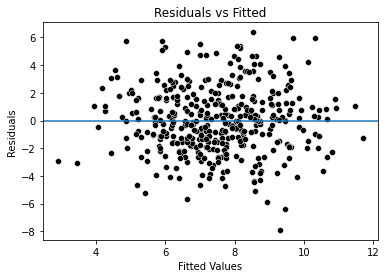

In [62]:
sns.scatterplot(pred_mult, resid_mult,
color='black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.title('Residuals vs Fitted')
plt.show()

The points appear to be __scattered randomly__. You can see that there is no visible pattern in the plot.

● The distribution seems to be __normal__. However, a __slight deviation__ towards the two ends can be ignored.

● On looking at the __Observed vs. Fitted__ curve, the scatter is too much to give a good enough despite an upward sloping line being fit.

● There is __no pattern__ in the __residuals vs. fitted__ values plot. Hence, you can conclude that the __errors are homoscedastic__.

#### Stepwise Regression

In [63]:
# Performing One-hot encoding
data = pd.get_dummies(prodata, drop_first =True)

In [64]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [65]:
Y = data['Sales']
X = data.drop('Sales', axis=1)

In [66]:
# performing backward regression.
# First we are using RFE( Recursive Feature Elimination) and deducing our features to 8 variables.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)
rfe = RFE(lm,n_features_to_select=8,verbose=1)
rfe = rfe.fit(X,Y)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


In [67]:
data.shape

(400, 12)

In [68]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('CompPrice', True, 1),
 ('Income', False, 3),
 ('Advertising', True, 1),
 ('Population', False, 4),
 ('Price', True, 1),
 ('Age', True, 1),
 ('Education', False, 2),
 ('ShelveLoc_Good', True, 1),
 ('ShelveLoc_Medium', True, 1),
 ('Urban_Yes', True, 1),
 ('US_Yes', True, 1)]

It is __True__ if a variable is included in the top 8 and __False__ otherwise.

In [69]:
X.columns[rfe.support_]

Index(['CompPrice', 'Advertising', 'Price', 'Age', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [70]:
X_final = X[X.columns[rfe.support_]]
lmbest = sm.OLS(Y, sm.add_constant(X_final)).fit()
lmbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          3.79e-155
Time:                        18:59:32   Log-Likelihood:                -604.71
No. Observations:                 400   AIC:                             1227.
Df Residuals:                     391   BIC:                             1263.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8353      0.523     13.065      0.000       5.807       7.864
CompPrice            0.0904      0.004     20.135      0.000       0.082       0.099
Advertising          0.1243      0.012     10.806      0.000       0.102       0.147
Price               -0.0957      0.003    -32.919      0.000      -0.101      -0.090
Age                 -0.0465      0.003    -13.434      0.000      -0.053      -0.040
ShelveLoc_Good       4.7870      0.166     28.775      0.000       4.460       5.114
ShelveLoc_Medium     1.8856      0.137     13.786      0.000       1.617       2.155
Urban_Yes            0.1568      0.123      1.278      0.202      -0.084       0.398
US_Yes              -0.0998      0.160     -0.625      0.533      -0.414       0.214
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.734
Skew:                           0.148   Prob(JB):                        0.420
Kurtosis:                       2.870   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
X_final = X_final.drop(['US_Yes'],axis=1)
lmbest = sm.OLS(Y, sm.add_constant(X_final)).fit()
lmbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     313.7
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          2.50e-156
Time:                        18:59:32   Log-Likelihood:                -604.91
No. Observations:                 400   AIC:                             1226.
Df Residuals:                     392   BIC:                             1258.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8187      0.522     13.060      0.000       5.792       7.845
CompPrice            0.0903      0.004     20.141      0.000       0.082       0.099
Advertising          0.1194      0.008     14.222      0.000       0.103       0.136
Price               -0.0957      0.003    -32.955      0.000      -0.101      -0.090
Age                 -0.0466      0.003    -13.465      0.000      -0.053      -0.040
ShelveLoc_Good       4.7855      0.166     28.792      0.000       4.459       5.112
ShelveLoc_Medium     1.8902      0.136     13.851      0.000       1.622       2.159
Urban_Yes            0.1553      0.123      1.267      0.206      -0.086       0.396
==============================================================================
Omnibus:                        1.727   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.802
Skew:                           0.153   Prob(JB):                        0.406
Kurtosis:                       2.878   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X_final = X_final.drop(['Urban_Yes'],axis=1)
lmbest = sm.OLS(Y, sm.add_constant(X_final)).fit()
lmbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     365.1
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          2.79e-157
Time:                        18:59:32   Log-Likelihood:                -605.73
No. Observations:                 400   AIC:                             1225.
Df Residuals:                     393   BIC:                             1253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8830      0.520     13.236      0.000       5.861       7.905
CompPrice            0.0907      0.004     20.225      0.000       0.082       0.099
Advertising          0.1199      0.008     14.287      0.000       0.103       0.136
Price               -0.0957      0.003    -32.918      0.000      -0.101      -0.090
Age                 -0.0464      0.003    -13.415      0.000      -0.053      -0.040
ShelveLoc_Good       4.7686      0.166     28.761      0.000       4.443       5.095
ShelveLoc_Medium     1.8767      0.136     13.783      0.000       1.609       2.144
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.728
Skew:                           0.140   Prob(JB):                        0.422
Kurtosis:                       2.842   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Sales ~ CompPrice + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium__ has __84.6%__ of the variability is explained by the model as given by the adjusted R2 value.

Since the __p-value__ for the t-test of the significance of all the regression coefficients is almost __zero__. We conclude that __all the explanatory variables in the best model are significant.__

## Regression Diagnostics of the Best Model

In [73]:
pred = lmbest.predict()
resid = Y - pred

To plot the diagnostics of a multiple regression model, 3 plots have been made.
* 1) To check for the __normality of residuals__, you can make a Q-Q plot
of the residuals.
* 2) To assess the fit of the model, __plot fitted vs. observed values__ of the
response variable and compare it with a line having intercept 0 and
slope 1.
* 3) To check for the __assumption of homoscedasticity__ (constant
variance), plot residuals vs. fitted values and check if the scatter is
random or not.


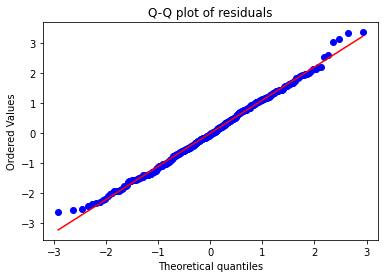

In [74]:
# Q-Q plot
stats.probplot(resid, dist = "norm", plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

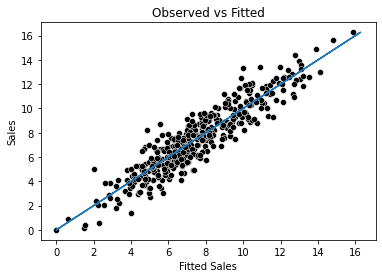

In [75]:
#Fitted vs Actual Sales
sns.scatterplot(pred, Y, color = 'black')
plt.xlabel('Fitted Sales')
plt.ylabel('Sales')
plt.plot(Y, Y)
plt.title('Observed vs Fitted')
plt.show()

The points in this graph lie very close to the reference line validating the better performance.

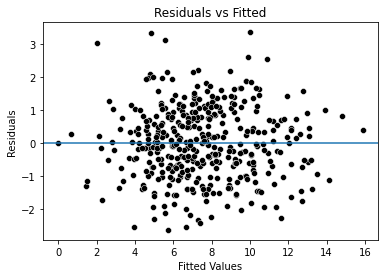

In [76]:
# Residuals vs Fitted Sales
sns.scatterplot(pred, resid, color='black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.title('Residuals vs Fitted')
plt.show()


There is no visible pattern in the plot, thus, you can conclude that errors
appear to be __homoscedastic__.

#### Multicollinearity

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [78]:
calc_vif(X_final)

,variables,VIF
0,CompPrice,49.591952
1,Advertising,1.985514
2,Price,38.287601
3,Age,9.771351
4,ShelveLoc_Good,1.877814
5,ShelveLoc_Medium,3.241473


In [79]:
X_final = X_final.drop('CompPrice', axis = 1)
calc_vif(X_final)

,variables,VIF
0,Advertising,1.982519
1,Price,9.308077
2,Age,8.033559
3,ShelveLoc_Good,1.847710
4,ShelveLoc_Medium,3.149700


The variable __CompPrice__ is multicollinear with the remaining variables.
Thus, we drop it from the independent variables and again check for
multicollinearity.

Using __VIF>10__, variables do not appear to be __highly collinear__. Thus, you can assume that there is no __severe multicollinearity__ in the data.

## Best Model

In [80]:
final_model = sm.OLS(Y,sm.add_constant(X_final)).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     175.0
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.00e-97
Time:                        18:59:32   Log-Likelihood:                -748.40
No. Observations:                 400   AIC:                             1509.
Df Residuals:                     394   BIC:                             1533.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.4712      0.514     28.168      0.000      13.461      15.481
Advertising          0.1093      0.012      9.145      0.000       0.086       0.133
Price               -0.0615      0.003    -18.227      0.000      -0.068      -0.055
Age                 -0.0500      0.005    -10.144      0.000      -0.060      -0.040
ShelveLoc_Good       4.8172      0.237     20.365      0.000       4.352       5.282
ShelveLoc_Medium     1.9388      0.194      9.983      0.000       1.557       2.321
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.484
Skew:                           0.020   Prob(JB):                        0.785
Kurtosis:                       2.834   Cond. No.                         847.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
pred = final_model.predict()
resid = Y - pred

To plot the diagnostics of a multiple regression model, 3 plots have been made.
* 1) To check for the __normality of residuals__, you can make a Q-Q plot
of the residuals.
* 2) To assess the fit of the model, __plot fitted vs. observed values__ of the
response variable and compare it with a line having intercept 0 and
slope 1.
* 3) To check for the __assumption of homoscedasticity__ (constant
variance), plot residuals vs. fitted values and check if the scatter is
random or not.

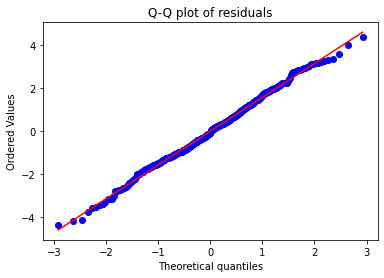

In [82]:
# Q-Q plot
stats.probplot(resid, dist = "norm", plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

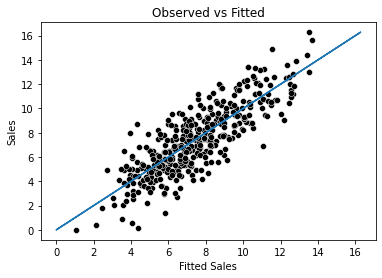

In [83]:
# Observed vs Fitted 
sns.scatterplot(pred, Y, color = 'black')
plt.xlabel('Fitted Sales')
plt.ylabel('Sales')
plt.plot(Y, Y)
plt.title('Observed vs Fitted')
plt.show()

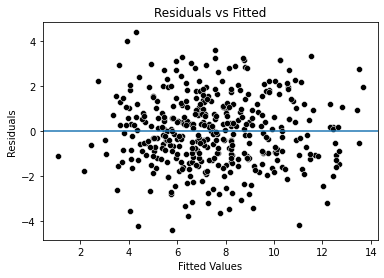

In [84]:
# Residuals vs Fitted 
sns.scatterplot(pred, resid, color='black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.title('Residuals vs Fitted')
plt.show()


#### Parallel Slopes Model

While performing the univariate analysis, it was observed that Sales is significantly impacted by ShelveLoc. Thus, ShelveLoc has been used as the categorical explanatory variable in parallel slope analysis.

Three models have been fitted for comparison. Two simple models with __Price__ and __ShelveLoc__ as independent variables and then a multiple regression model consisting of both __Price__ and __ShelveLoc__.

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           7.62e-21
Time:                        18:59:33   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X4 = pd.get_dummies(prodata['ShelveLoc'],drop_first = True)
modelS_Sh = sm.OLS(Y, sm.add_constant(X4)).fit()
modelS_Sh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.27e-33
Time:                        18:59:33   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5229      0.239     23.131      0.000       5.054       5.992
Good           4.6911      0.348     13.464      0.000       4.006       5.376
Medium         1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R2 for this model is __31.4%__ which is greater than the model with __Price__ as the independent variable.

In [87]:
X5 = pd.concat([prodata['Price'],X4],axis=1)
modelS_PSh=sm.OLS(Y, sm.add_constant(X5)).fit()
modelS_PSh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     156.6
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           6.49e-67
Time:                        18:59:33   Log-Likelihood:                -825.92
No. Observations:                 400   AIC:                             1660.
Df Residuals:                     396   BIC:                             1676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0018      0.503     23.839      0.000      11.012      12.992
Price         -0.0567      0.004    -13.967      0.000      -0.065      -0.049
Good           4.8958      0.286     17.123      0.000       4.334       5.458
Medium         1.8620      0.235      7.932      0.000       1.401       2.324
==============================================================================
Omnibus:                        1.779   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.651
Skew:                           0.062   Prob(JB):                        0.438
Kurtosis:                       2.711   Cond. No.                         638.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The combined model has the highest __adjusted R2__. On adding
Shelveloc to the model of __Sales__ on __Price__, the __adjusted R2__ increases from __0.196__ to __0.539__.

__Yes__. Since the p-value of ShelveLoc is almost zero in the combined model, it contributes significantly to explain the dependent variable Sales.

#### Diagnostics of Parallel Slopes Model

Text(0.5, 1.0, 'Histogram of Errors')

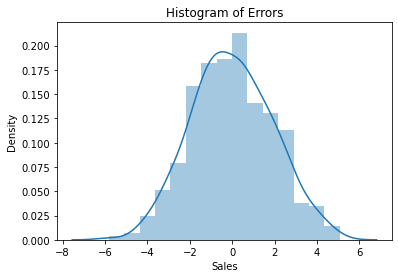

In [88]:
pred_parallel = modelS_PSh.predict()
resid_parallel = Y - pred_parallel
sns.distplot(resid_parallel,kde=True)
plt.title("Histogram of Errors")

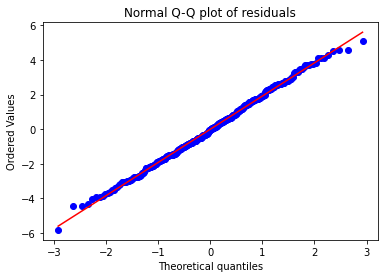

In [89]:
stats.probplot(resid_parallel, dist="norm",
plot=plt, fit = True)
plt.title('Normal Q-Q plot of residuals')
plt.show()

Based on the __histogram__and __Q-Q plot__, the residuals appear to have a __normal distribution__.

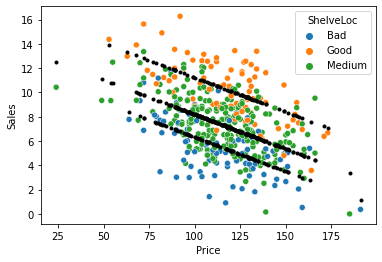

In [90]:
fig, ax = plt.subplots()
sns.scatterplot('Price','Sales', hue ='ShelveLoc', data=prodata)
ax.scatter(prodata['Price'],pred_parallel,marker = '.', color = 'black')
plt.show()

The regression lines (black dots) are parallel to each other in this case.

Yes, the intercepts of the lines are different though the slope is the same.

## Interactions

An __interaction effect__ exists when the effect of an independent variable on a dependent variable changes, depending on the value(s) of one or more other independent variables. 
In a regression equation, an __interaction effect__ is represented as the __product of two or more independent variables__.

In [91]:
from statsmodels.formula.api import ols
prodata1 = pd.get_dummies(prodata, drop_first =True)
int_model = ols(formula = 'Sales ~ Price + ShelveLoc_Good+ShelveLoc_Medium+Price:ShelveLoc_Good+Price:ShelveLoc_Medium', data = prodata1).fit()
int_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     94.17
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           4.62e-65
Time:                        18:59:34   Log-Likelihood:                -825.11
No. Observations:                 400   AIC:                             1662.
Df Residuals:                     394   BIC:                             1686.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.8330      0.966     12.252      0.000       9.934      13.732
Price                     -0.0552      0.008     -6.672      0.000      -0.071      -0.039
ShelveLoc_Good             6.1359      1.393      4.405      0.000       3.398       8.874
ShelveLoc_Medium           1.6305      1.172      1.392      0.165      -0.673       3.934
Price:ShelveLoc_Good      -0.0106      0.012     -0.900      0.369      -0.034       0.013
Price:ShelveLoc_Medium     0.0020      0.010      0.198      0.843      -0.018       0.022
==============================================================================
Omnibus:                        1.921   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.763
Skew:                           0.067   Prob(JB):                        0.414
Kurtosis:                       2.704   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The __p-value__ corresponding to the coefficient estimates of interaction terms is greater than 0.05. 

Hence, you can conclude that the interaction of __Price__ and __ShelveLoc__ does not play a significant role in explaining Sales in the model.